In [8]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(8,8))

from matplotlib.pyplot import imshow



import json
import time
from os import path

import matplotlib.patches as patches

import pandas as pd

import camhd_motion_analysis as ma
import pycamhd.lazycache as camhd

In [2]:
#metadata_repo = "/Users/aaron/workspace/CamHD_analysis/CamHD_motion_metadata/"  # On Mac
metadata_repo = "/home/aaron/canine/camhd_analysis/CamHD_motion_metadata"

regions_filename = "/RS03ASHS/PN03B/06-CAMHDA301/2016/03/01/CAMHDA301-20160301T000000Z_optical_flow_regions.json"


data_filename = metadata_repo + regions_filename

In [3]:
regions_json = ma.load_regions( data_filename )

regions = regions_json["regions"]

regions = pd.DataFrame(  regions )
regions = regions.drop('stats',1)

static = regions[ regions.type == "static"]


In [4]:

min_length = 30

static["length"] = static.endFrame - static.startFrame
static = static.loc[ static.length >= min_length ]

print(static)

    endFrame  startFrame    type  length
0       1061         591  static     470
2       1361        1231  static     130
6       2161        1721  static     440
8       2571        2471  static     100
10      2741        2621  static     120
12      3791        2911  static     880
14      4131        3961  static     170
16      4311        4181  static     130
18      4861        4581  static     280
20      5441        5101  static     340
22      5741        5601  static     140
24      6791        5891  static     900
26      7151        7091  static      60
28      7741        7401  static     340
30      8321        8011  static     310
32      8621        8481  static     140
34      9671        8771  static     900
36     10031        9981  static      50
38     10621       10301  static     320
40     10871       10821  static      50
42     11121       10891  static     230
44     11421       11291  static     130
46     12481       11581  static     900
48     12841    

/home/aaron/miniconda3/envs/camhd_motion_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [5]:
lazycache_url = "https://camhd-app-dev-nocache.appspot.com/v1/org/oceanobservatories/rawdata/files/"
qt = camhd.lazycache( lazycache_url )

mov_path = regions_json['movie']['URL']

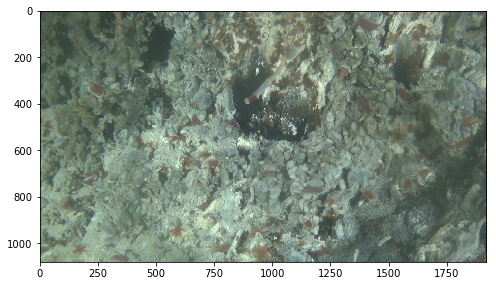

In [18]:

avg_images = {}

static = static.head(2)

for idx,r in static.iterrows():
    
    samples = 5
    frames = range( r.startFrame, r.endFrame, round(r.length / (samples+1)) )
    
    images = [ qt.get_frame( mov_path, f, timeout=30 ) for f in frames ]

    # Create a numpy array of floats to store the average (assume RGB images)
    arr = np.zeros(images[0].shape,np.float)

    # Build up average pixel intensities, casting each image as an array of floats
    for im in images:
         arr = arr+im
            
    arr = arr / len(images)

    # Round values in array and cast as 8-bit integer
    arr=np.array(np.round(arr),dtype=np.uint8)

    imshow(np.asarray(arr))
    
    avg_images[idx] = arr
    
    


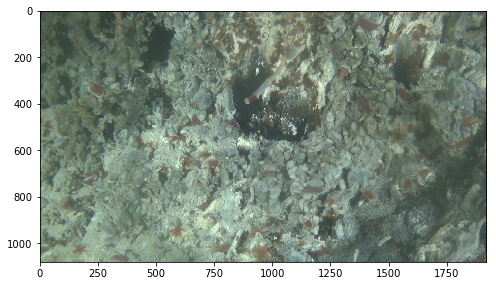

In [23]:
for key,val in avg_images.items():
    plt.figure
    imshow( val )